In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200) #set to show all columns


%matplotlib inline

In [2]:
df = pd.read_csv('../data/diabetic_data_dummy.csv')

In [3]:
df.head()

,Unnamed: 0,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_12,discharge_disposition_id_13,discharge_disposition_id_14,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_19,discharge_disposition_id_20,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,metformin_Down,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_Steady,glyburide_Up,pioglitazone_Down,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_Steady,miglitol_Up,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_Steady,glyburide-metformin_Up,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_Norm,diag_1_circulatory,diag_1_diabetes,diag_1_digestive,diag_1_genitourinary,diag_1_injury,diag_1_musculoskeletal,diag_1_neoplasms,diag_1_respiratory,diag_2_circulatory,diag_2_diabetes,diag_2_digestive,diag_2_genitourinary,diag_2_injury,diag_2_musculoskeletal,diag_2_neoplasms,diag_2_respiratory,diag_3_circulatory,diag_3_diabetes,diag_3_digestive,diag_3_genitourinary,diag_3_injury,diag_3_musculoskeletal,diag_3_neoplasms,diag_3_respiratory
0,0,1,1,41,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,3,59,0,18,0,0,0,9,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,2,11,5,13,2,0,1,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,2,44,1,16,0,0,0,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,4,0,1,51,0,8,0,0,0,5,1,1,0,0,0,0

In [4]:
df2 = pd.read_csv('../data/diabetic_data.csv')

In [5]:
df2.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df2.readmitted = df2.readmitted.apply(lambda x: 0 if x == "NO" else 1 if x == "<30" else 2)

Age Summary


readmitted      0     1     2
age                          
[0-10)        132     3    26
[10-20)       427    40   224
[20-30)       911   236   510
[30-40)      2164   424  1187
[40-50)      5380  1027  3278
[50-60)      9671  1668  5917
[60-70)     12084  2502  7897
[70-80)     13524  3069  9475
[80-90)      8896  2078  6223
[90-100)     1675   310   808


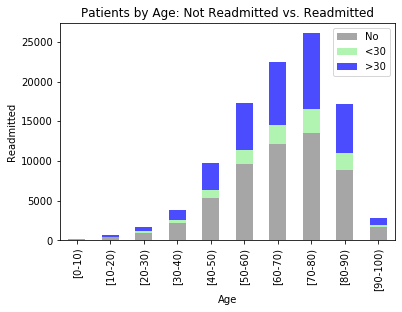

In [7]:
# Age summary
print('Age Summary')

print('\n')
print(df2.groupby(['age','readmitted']).age.count().unstack())

# Age class visualization
ageclass = df2.groupby(['age','readmitted']).age.count().unstack()
p1 = ageclass.plot(kind = 'bar', stacked = True, 
                   title = 'Patients by Age: Not Readmitted vs. Readmitted', 
                   color = ['grey','lightgreen', 'blue'], alpha = .70)
p1.set_xlabel('Age')
p1.set_ylabel('Readmitted')
p1.legend(['No','<30', '>30'])
#plt.savefig('../image/Age_Readmiited.png')
plt.show()

In [8]:
print(ppa.columns)


NameError: name 'ppa' is not defined

In [9]:
#print(df2.groupby(['age','readmitted']).age.count().unstack())
#print(df2.groupby(['readmitted', 'age']).readmitted.count().unstack().sum())
#print(df2.groupby(['age','readmitted']).age.count().unstack() * 100 / (df2.groupby(['readmitted', 'age']).readmitted.count().unstack().sum()))
#print(df2.groupby(['age','readmitted']).age.count().unstack()[0][0])
ppa = df2.groupby(['age','readmitted']).age.count().unstack()
spa = df2.groupby(['age','readmitted']).age.count().unstack()
tpa = df2.groupby(['readmitted', 'age']).readmitted.count().unstack().sum()
for x in range(0, 3):
    ppa[x] = spa[x] / tpa

print(ppa)

readmitted         0         1         2
age                                     
[0-10)      0.819876  0.018634  0.161491
[10-20)     0.617945  0.057887  0.324168
[20-30)     0.549789  0.142426  0.307785
[30-40)     0.573245  0.112318  0.314437
[40-50)     0.555498  0.106040  0.338462
[50-60)     0.560443  0.096662  0.342895
[60-70)     0.537473  0.111284  0.351243
[70-80)     0.518797  0.117731  0.363472
[80-90)     0.517300  0.120835  0.361865
[90-100)    0.599714  0.110992  0.289295


Age Summary


readmitted      0     1     2
age                          
[0-10)        132     3    26
[10-20)       427    40   224
[20-30)       911   236   510
[30-40)      2164   424  1187
[40-50)      5380  1027  3278
[50-60)      9671  1668  5917
[60-70)     12084  2502  7897
[70-80)     13524  3069  9475
[80-90)      8896  2078  6223
[90-100)     1675   310   808


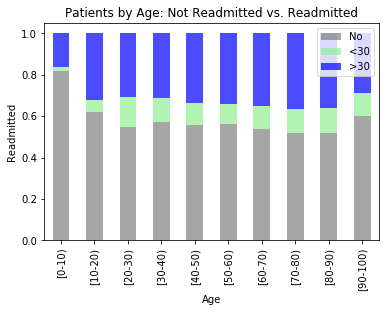

In [10]:
print('Age Summary')

print('\n')
print(df2.groupby(['age','readmitted']).age.count().unstack())

# Age class visualization
p1 = ppa.plot(kind = 'bar', stacked = True, 
                   title = 'Patients by Age: Not Readmitted vs. Readmitted', 
                   color = ['grey','lightgreen', 'blue'], alpha = .70)
p1.set_xlabel('Age')
p1.set_ylabel('Readmitted')
p1.legend(['No','<30', '>30'])
#plt.savefig('../image/Percentage_Age_Readmitted.png')
plt.show()

Hospital Stay Summary


readmitted           0     1     2
time_in_hospital                  
1                 8575  1162  4471
2                 9593  1712  5919
3                 9777  1894  6085
4                 7216  1644  5064
5                 5181  1199  3586
6                 3835   949  2755
7                 2984   752  2123
8                 2177   625  1589
9                 1491   412  1099
10                1168   336   838
11                 961   195   699
12                 737   193   518
13                 640   149   421
14                 529   135   378


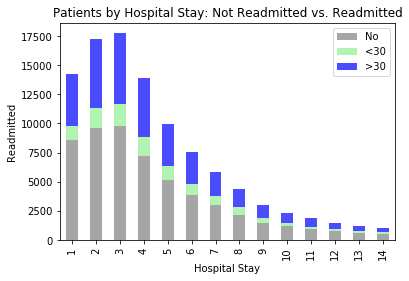

In [11]:
# Hospital Stay class summary
print('Hospital Stay Summary')

print('\n')
print(df2.groupby(['time_in_hospital','readmitted']).time_in_hospital.count().unstack())

# Hospital Stay visualization
ageclass = df2.groupby(['time_in_hospital','readmitted']).time_in_hospital.count().unstack()
p1 = ageclass.plot(kind = 'bar', stacked = True, 
                   title = 'Patients by Hospital Stay: Not Readmitted vs. Readmitted', 
                   color = ['grey','lightgreen', 'blue'], alpha = .70)
p1.set_xlabel('Hospital Stay')
p1.set_ylabel('Readmitted')
p1.legend(['No','<30', '>30'])
#plt.savefig('../image/Hospital_Stay_Readmitted.png')
plt.show()

In [12]:
pph = df2.groupby(['time_in_hospital','readmitted']).time_in_hospital.count().unstack()
sph = df2.groupby(['time_in_hospital','readmitted']).time_in_hospital.count().unstack()
tph = df2.groupby(['readmitted', 'time_in_hospital']).readmitted.count().unstack().sum()
for x in range(0, 3):
    pph[x] = sph[x] / tph
print(pph)

readmitted               0         1         2
time_in_hospital                              
1                 0.603533  0.081785  0.314682
2                 0.556955  0.099396  0.343648
3                 0.550631  0.106668  0.342701
4                 0.518242  0.118070  0.363689
5                 0.519868  0.120309  0.359823
6                 0.508688  0.125879  0.365433
7                 0.509302  0.128350  0.362349
8                 0.495787  0.142337  0.361877
9                 0.496669  0.137242  0.366089
10                0.498719  0.143467  0.357814
11                0.518059  0.105121  0.376819
12                0.508978  0.133287  0.357735
13                0.528926  0.123140  0.347934
14                0.507678  0.129559  0.362764


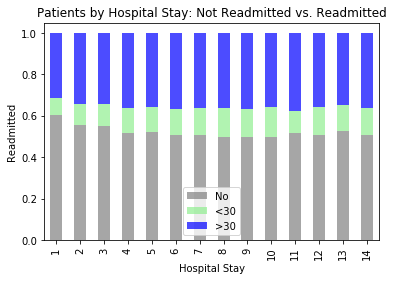

In [13]:
p1 = pph.plot(kind = 'bar', stacked = True, 
                   title = 'Patients by Hospital Stay: Not Readmitted vs. Readmitted', 
                   color = ['grey','lightgreen', 'blue'], alpha = .70)
p1.set_xlabel('Hospital Stay')
p1.set_ylabel('Readmitted')
p1.legend(['No','<30', '>30'])
#plt.savefig('../image/Percentage_Hospital_Stay_Readmitted.png')
plt.show()

Gender Summary


readmitted             0       1        2
gender                                   
Female           29038.0  6152.0  19518.0
Male             25823.0  5205.0  16027.0
Unknown/Invalid      3.0     NaN      NaN


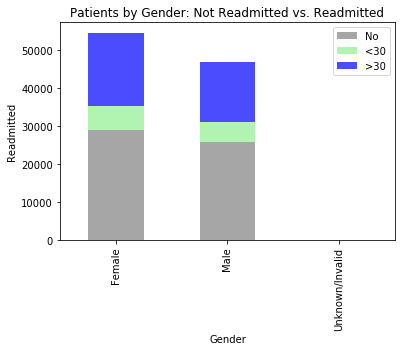

In [14]:
# gender summary
print('Gender Summary')

print('\n')
print(df2.groupby(['gender','readmitted']).gender.count().unstack())

# gender visualization
genderclass = df2.groupby(['gender','readmitted']).gender.count().unstack()
p1 = genderclass.plot(kind = 'bar', stacked = True, 
                   title = 'Patients by Gender: Not Readmitted vs. Readmitted', 
                   color = ['grey','lightgreen', 'blue'], alpha = .70)
p1.set_xlabel('Gender')
p1.set_ylabel('Readmitted')
p1.legend(['No','<30', '>30'])
plt.show()

Number of Diagnoses Summary


readmitted            0     1      2
number_diagnoses                    
1                   167    13     39
2                   687    62    274
3                  1863   209    763
4                  3474   457   1606
5                  7354  1043   2996
6                  5706  1058   3397
7                  5542  1119   3732
8                  5564  1254   3798
9                 24448  6125  18901
10                    9     3      5
11                    3     3      5
12                    5     1      3
13                    7     3      6
14                    3     1      3
15                    5     2      3
16                   27     4     14


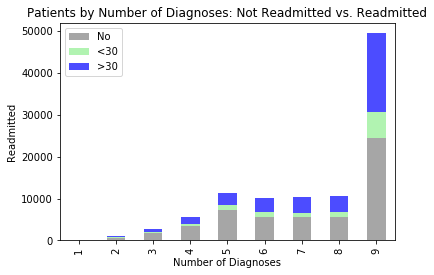

In [15]:
# diagnosis summary
print('Number of Diagnoses Summary')

print('\n')
print(df2.groupby(['number_diagnoses','readmitted']).number_diagnoses.count().unstack())

# gender visualization
genderclass = df2.groupby(['number_diagnoses','readmitted']).number_diagnoses.count().unstack()
p1 = genderclass.iloc[0:9, :].plot(kind = 'bar', stacked = True, 
                   title = 'Patients by Number of Diagnoses: Not Readmitted vs. Readmitted', 
                   color = ['grey','lightgreen', 'blue'], alpha = .70)
p1.set_xlabel('Number of Diagnoses')
p1.set_ylabel('Readmitted')
p1.legend(['No','<30', '>30'])
#plt.savefig('../image/NoD_Readmitted.png')
plt.show()

In [16]:
ppnd = df2.groupby(['number_diagnoses','readmitted']).number_diagnoses.count().unstack()
spnd = df2.groupby(['number_diagnoses','readmitted']).number_diagnoses.count().unstack()
tpnd = df2.groupby(['readmitted', 'number_diagnoses']).readmitted.count().unstack().sum()
for x in range(0, 3):
    ppnd[x] = spnd[x] / tpnd
print(ppnd.iloc[0:9, :])

readmitted               0         1         2
number_diagnoses                              
1                 0.762557  0.059361  0.178082
2                 0.671554  0.060606  0.267840
3                 0.657143  0.073721  0.269136
4                 0.627416  0.082536  0.290049
5                 0.645484  0.091547  0.262968
6                 0.561559  0.104124  0.334317
7                 0.533244  0.107669  0.359088
8                 0.524115  0.118124  0.357762
9                 0.494159  0.123802  0.382039


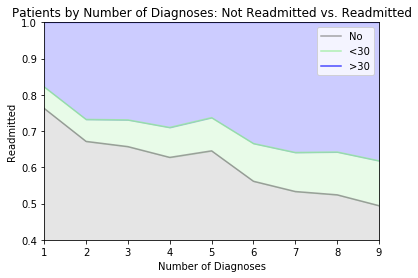

In [17]:
# ignoring values greater than 9, due to insignificant amount of data
p1 = ppnd.iloc[0:9, :].plot(kind = 'line', stacked = True, 
                   title = 'Patients by Number of Diagnoses: Not Readmitted vs. Readmitted', 
                   color = ['grey','lightgreen', 'blue'], alpha = .70)
p1.set_xlabel('Number of Diagnoses')
p1.set_ylabel('Readmitted')
plt.fill_between(ppnd.iloc[0:9, :].index, ppnd.iloc[0:9, :][0], color = 'gray', alpha = 0.2)
plt.fill_between(ppnd.iloc[0:9, :].index, ppnd.iloc[0:9, :][0] + ppnd.iloc[0:9, :][1], ppnd.iloc[0:9, :][0], color = 'lightgreen', alpha = 0.2)
plt.fill_between(ppnd.iloc[0:9, :].index, 1 - ppnd.iloc[0:9, :][2], 1, color = 'blue', alpha = 0.2)
p1.set_ylim(0.4, 1)
p1.legend(['No','<30', '>30'])
#plt.savefig('../image/Percentage_NoD_Readmitted.png')
plt.show()

In [22]:
df3=df2.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df3['pairs'] = list(zip(df3.level_0, df3.level_1))

# set index to pairs
df3.set_index(['pairs'], inplace = True)

#d rop level columns
df3.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df3.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df3.drop_duplicates(inplace=True)

In [26]:
df3[(df3.cc>.05) & (df3.cc <1)]

,cc
pairs,
"(patient_nbr, encounter_id)",0.512028
"(num_medications, time_in_hospital)",0.466135
"(num_procedures, num_medications)",0.385767
"(time_in_hospital, num_lab_procedures)",0.318450
"(num_medications, num_lab_procedures)",0.268161
"(number_emergency, number_inpatient)",0.266559
"(encounter_id, number_diagnoses)",0.265149
"(number_diagnoses, num_medications)",0.261526
"(patient_nbr, number_diagnoses)",0.226847


In [31]:
'readmitted' in df3.index

False